<a href="https://colab.research.google.com/github/GurkiratSarna/CE888-Decision-Making-UoE/blob/master/Lab_2/Lab_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import matplotlib
import pandas as pd
import numpy as np
import seaborn as sns

In [0]:
# Bootstraping

In [3]:
customer_df=pd.read_csv('https://raw.githubusercontent.com/albanda/CE888/master/lab2%20-%20bootstrap/customers.csv')
print(customer_df)
customer_data = customer_df.values.T[1]
print(customer_data)

    Day   Millons of pounds in sales
0     1                          2.0
1     2                          8.0
2     3                         20.0
3     4                         13.0
4     5                          5.0
5     6                          9.0
6     7                         10.0
7     8                          8.0
8     9                         22.0
9    10                         10.0
10   11                          2.0
11   12                          4.0
12   13                          7.0
13   14                          9.0
[ 2.  8. 20. 13.  5.  9. 10.  8. 22. 10.  2.  4.  7.  9.]


In [4]:
customer_data.shape

(14,)

In [0]:
# Checking the notes from the lecture, create here your own bootstrap function:
# 1. Create an array of samples of shape (n_iterations, sample_size) - this creates a 2d array of num of rows different everytime, 
#    the number of rows is same as ith value transferred from from the for loop
# 2. Calculate and save the mean of the array (this is "data_mean" that is returned by the function) - calculate the mean of the whole df
# 3. In each iteration:
# 3.1 Get the data corresponding to that iteration (new_samples[iteration, :])
# 3.2 Calculate the mean of the iteration data and store it
# (At this point you should have an array of n_iterations values) - these values are mean of each row in the 2d array
# 4. Calculate the lower and upper bounds for a 95% CI (hint: check the percentile function on Numpy)
# 5. Return data_mean, and the lower and upper bounds of your interval

def boostrap_mean(sample, sample_size, n_iterations):
  bstraplist=np.random.choice(sample,(n_iterations,sample_size),replace=True)
  #print(bstraplist)
  data_mean=np.mean(bstraplist)
  mean_list=[]
  for i in range(len(bstraplist)):
    new_sample=bstraplist[i,:]
    sample_mean=np.mean(new_sample)
    mean_list.append(sample_mean)
    #print(new_sample)
    #print(sample_mean)
  #print(mean_list)

  #percentile function returns the scalar value. If you pass 2.5 then the value at 2.5th percent of the array. No need to sort.
  #for 95% we need to remove 2.5% from below and top - hence give 2.5 for lowest and 97.5 for highest
  lower=np.percentile(mean_list, 2.5)
  upper=np.percentile(mean_list, 97.5)
  #print(lower,"\t",upper)
  #print(data_mean)
  #print("----"*20)
  return data_mean,lower,upper

(0.0, 100000.0)

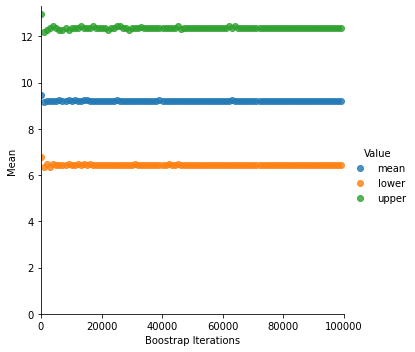

In [6]:
# Call your bootstrap function and plot the results

boots_cust1 = []
for i in range(100, 100000, 1000):
    boot = boostrap_mean(customer_data, customer_data.shape[0], i)
    boots_cust1.append([i, boot[0], "mean"])
    boots_cust1.append([i, boot[1], "lower"])
    boots_cust1.append([i, boot[2], "upper"])

df_boot = pd.DataFrame(boots_cust1, columns=['Boostrap Iterations', 'Mean', "Value"])
sns_plot = sns.lmplot(df_boot.columns[0], df_boot.columns[1], data=df_boot, fit_reg=False, hue="Value")

sns_plot.axes[0, 0].set_ylim(0,)
sns_plot.axes[0, 0].set_xlim(0, 100000)

#sns_plot.savefig("bootstrap_confidence.png", bbox_inches='tight')
#sns_plot.savefig("bootstrap_confidence.pdf", bbox_inches='tight')

Now, modify the bootstrap function so that you can pass your desired confidence interval as a parameter.

In [0]:
def boostrap_mean_ci(sample, sample_size, iterations, ci):
    bstraplist=np.random.choice(sample,(iterations,sample_size),replace=True)
    data_mean=np.mean(bstraplist)
    #print(bstraplist)
    mean_list=[]
    for i in range(len(bstraplist)):
        new_sample=bstraplist[i,:]
        sample_mean=np.mean(new_sample)
        mean_list.append(sample_mean)
        #print(new_sample)
        #print(sample_mean)
    #print(mean_list)
    lower=np.percentile(mean_list, (100-ci)/2)
    upper=np.percentile(mean_list, ci+(100-ci)/2)
    #print(lower,"\t",upper)
    #print(data_mean)
    #print("----"*20)
    return data_mean, lower, upper

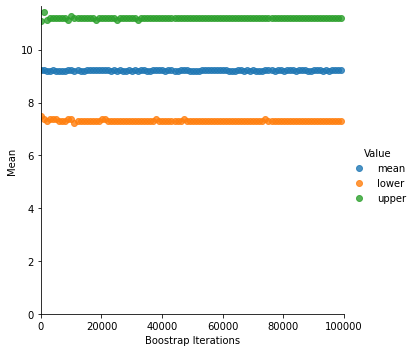

In [9]:
#80% CI
boots_cust2 = []
for i in range(100, 100000, 1000):
    boot = boostrap_mean_ci(customer_data, customer_data.shape[0], i, 80)
    boots_cust2.append([i, boot[0], "mean"])
    boots_cust2.append([i, boot[1], "lower"])
    boots_cust2.append([i, boot[2], "upper"])

df_boot = pd.DataFrame(boots_cust2, columns=['Boostrap Iterations', 'Mean', "Value"])
sns_plot = sns.lmplot(df_boot.columns[0], df_boot.columns[1], data=df_boot, fit_reg=False, hue="Value")

sns_plot.axes[0, 0].set_ylim(0,)
sns_plot.axes[0, 0].set_xlim(0, 100000)

sns_plot.savefig("bootstrap_confidence_80.png", bbox_inches='tight')
sns_plot.savefig("bootstrap_confidence_80.pdf", bbox_inches='tight')

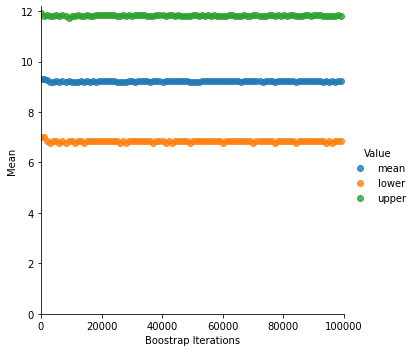

In [10]:
#90% CI
boots_cust3 = []
for i in range(100, 100000, 1000):
    boot = boostrap_mean_ci(customer_data, customer_data.shape[0], i, 90)
    boots_cust3.append([i, boot[0], "mean"])
    boots_cust3.append([i, boot[1], "lower"])
    boots_cust3.append([i, boot[2], "upper"])

df_boot = pd.DataFrame(boots_cust3, columns=['Boostrap Iterations', 'Mean', "Value"])
sns_plot = sns.lmplot(df_boot.columns[0], df_boot.columns[1], data=df_boot, fit_reg=False, hue="Value")

sns_plot.axes[0, 0].set_ylim(0,)
sns_plot.axes[0, 0].set_xlim(0, 100000)

sns_plot.savefig("bootstrap_confidence_90.png", bbox_inches='tight')
sns_plot.savefig("bootstrap_confidence_90.pdf", bbox_inches='tight')

In [0]:
vehicles_df=pd.read_csv('https://raw.githubusercontent.com/albanda/CE888/master/lab2%20-%20bootstrap/vehicles.csv')

In [12]:
print(vehicles_df)

     Current fleet  New Fleet
0               18       24.0
1               15       27.0
2               18       27.0
3               16       25.0
4               17       31.0
..             ...        ...
244             27        NaN
245             27        NaN
246             32        NaN
247             28        NaN
248             31        NaN

[249 rows x 2 columns]


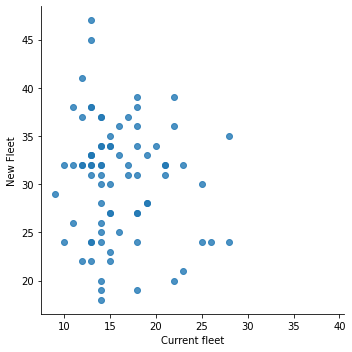

In [13]:
#scatterplots for the current fleet and the proposed fleet
sns.lmplot(vehicles_df.columns[0], vehicles_df.columns[1],data=vehicles_df, fit_reg=False)

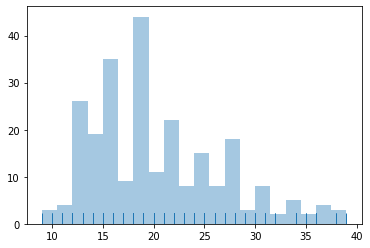

In [14]:
#histograms for the current fleet and the proposed fleet
datacol0=vehicles_df[vehicles_df.columns[0]].values
sns.distplot(datacol0, bins=20, kde=False, rug=True)

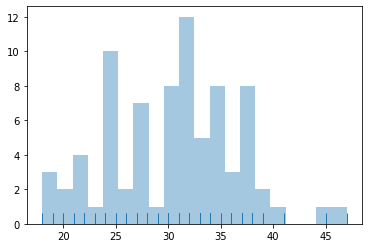

In [15]:
#new fleet
datacol1=vehicles_df[vehicles_df.columns[1]].values
sns.distplot(datacol1, bins=20, kde=False, rug=True)

In [16]:
#Calculate the mean of both samples- Nan values are still there in the dataset but are not calculated in np.mean.
vehicles_df_nonan=vehicles_df[~np.isnan(vehicles_df)]
print(np.mean(vehicles_df_nonan))

Current fleet    20.144578
New Fleet        30.481013
dtype: float64


In [17]:
#Bootstrap old fleet for 100 iterations
boots_veh_old = []
#for i in range(100, 100000, 1000):
boot = boostrap_mean_ci(datacol0, datacol0.shape[0],100,80)
boots_veh_old.append([boot[0], "mean"])
boots_veh_old.append([boot[1], "lower"])
boots_veh_old.append([boot[2], "upper"])

df_boot = pd.DataFrame(boots_veh_old, columns=['Mean', "Value"])
print(df_boot)
#sns_plot = sns.lmplot(df_boot.columns[0], df_boot.columns[1], data=df_boot, fit_reg=False, hue="Value")

#sns_plot.axes[0, 0].set_ylim(0,)
#sns_plot.axes[0, 0].set_xlim(0, 100000)

#sns_plot.savefig("bootstrap_confidence.png", bbox_inches='tight')
#sns_plot.savefig("bootstrap_confidence.pdf", bbox_inches='tight')

        Mean  Value
0  20.150080   mean
1  19.583133  lower
2  20.775100  upper


In [18]:
#Remove NAN values from new Fleet
datacol1_nonan = datacol1[np.logical_not(np.isnan(datacol1))]
#print(datacol1_nonan)

#Bootstrap new fleet for 100 iterations

boots_veh_new = []
#for i in range(100, 100000, 1000):
boot = boostrap_mean_ci(datacol1_nonan, datacol1_nonan.shape[0], 100, 80)
boots_veh_new.append([boot[0], "mean"])
boots_veh_new.append([boot[1], "lower"])
boots_veh_new.append([boot[2], "upper"])

df_boot = pd.DataFrame(boots_veh_new, columns=['Mean', "Value"])
print(df_boot)

        Mean  Value
0  30.514177   mean
1  29.707595  lower
2  31.317722  upper


In [19]:
t_obs=boots_veh_new[0][0]-boots_veh_old[0][0]
t_obs

10.364096893904733

In [20]:
#Permutation Test
#print(len(datacol0))
#print(len(datacol1_nonan))

l_datacol0=len(datacol0)
l_datacol1_nonan=len(datacol1_nonan)

concat = np.concatenate((datacol0,datacol1_nonan))
#print(concat)
#print(len(concat))

count=0
for i in range(20000):
    
    perm = np.random.permutation(concat)
    #print(perm)
    #print(len(perm))
    pold=perm[:int(l_datacol0)]
    #print(pold)
    #print(len(pold))
    pnew=perm[int(l_datacol0):]
    #print(pnew)
    #print(len(pnew))
    poldmean=np.mean(pold)
    #print(poldmean)
    pnewmean=np.mean(pnew)
    #print(pnewmean)
    t_perm=pnewmean-poldmean
    print("t_perm : ",t_perm, " t_obs : ", t_obs)
    if(t_perm>t_obs):
      count=count+1
    print("--"*20)
p_value=count/20000
print(p_value)
    

Streaming output truncated to the last 5000 lines.
t_perm :  -0.6185755680951672  t_obs :  10.364096893904733
----------------------------------------
t_perm :  0.5486248792638904  t_obs :  10.364096893904733
----------------------------------------
t_perm :  0.4819277108433724  t_obs :  10.364096893904733
----------------------------------------
t_perm :  1.2989680239947141  t_obs :  10.364096893904733
----------------------------------------
t_perm :  1.0988765187331602  t_obs :  10.364096893904733
----------------------------------------
t_perm :  1.6991510345178185  t_obs :  10.364096893904733
----------------------------------------
t_perm :  0.4152305424228544  t_obs :  10.364096893904733
----------------------------------------
t_perm :  -1.318895836510599  t_obs :  10.364096893904733
----------------------------------------
t_perm :  -0.8853642417772356  t_obs :  10.364096893904733
----------------------------------------
t_perm :  1.8325453713588544  t_obs :  10.36409689390473

###The significance level convention is 0.05, and as p-value is less than that we can reject the Null Hypothesis stating that there were no differences in the old and new fleet and accept the Alternate Hypothesis stating the New Fleet is better than the old Fleet.